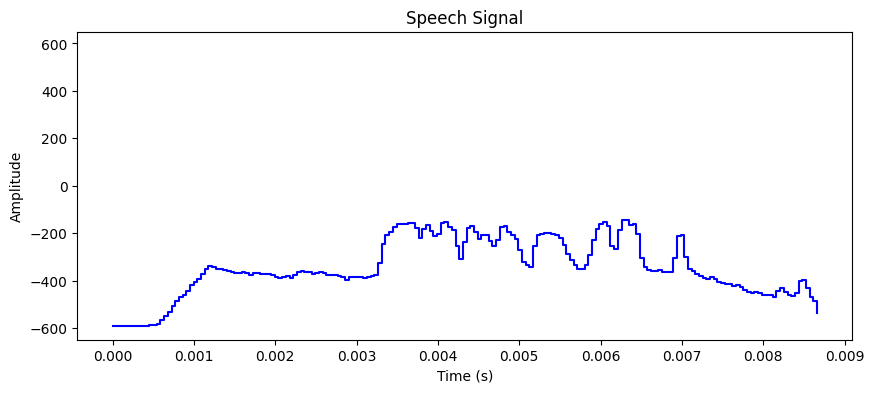

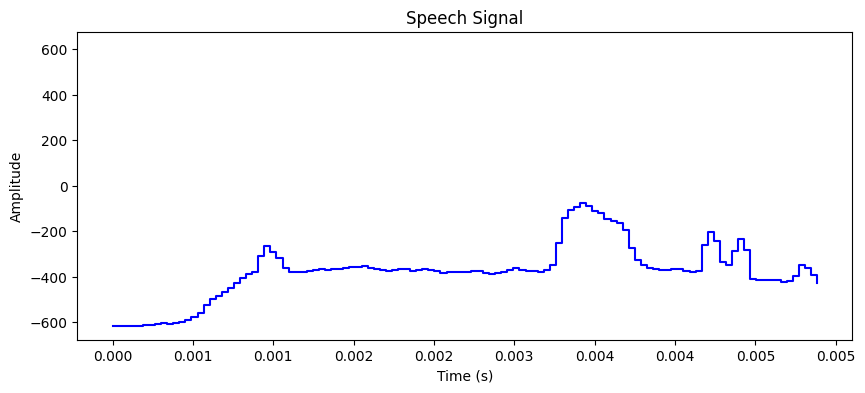

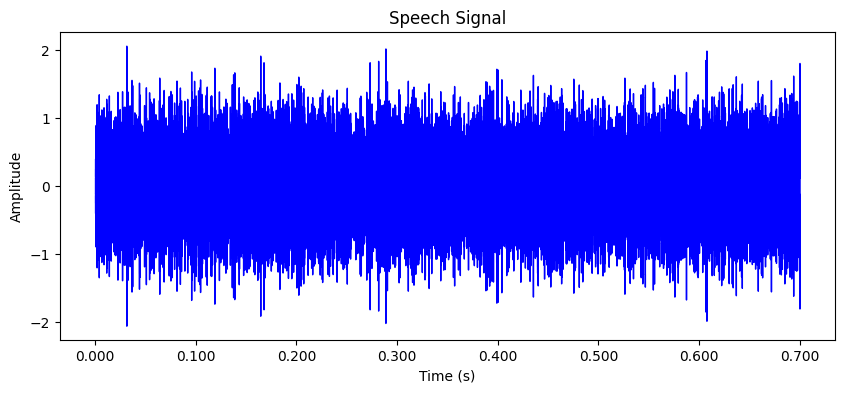

In [5]:
import numpy as np
import librosa
from keras.models import Sequential
from keras.layers import LSTM, Bidirectional, Dense
import matplotlib.pyplot as plt
import soundfile as sf
import librosa.display
def extract_features(audio_file, feature='mfcc', n_mfcc=13):
    y, sr = librosa.load(audio_file)
    if feature == 'stft':
        feature = np.abs(librosa.stft(y))
    elif feature == 'mfcc':
        feature = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=n_mfcc)
    elif feature == 'lpc':
        feature = librosa.lpc(y, order=n_mfcc)
    return feature, sr

def plot_waveform(y, sr, title='Speech Signal'):
    """Plot the waveform of the audio signal."""
    plt.figure(figsize=(10, 4))
    librosa.display.waveshow(y, sr=sr, color='blue')
    plt.title(title)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()

bhanumathi_weds_rajat_features,sr1 = extract_features("Lab-8.wav")
plot_waveform(bhanumathi_weds_rajat_features,sr1)

bharat_features,sr2 = extract_features("Bharat.wav")
plot_waveform(bharat_features,sr2)

model = Sequential()
model.add(Bidirectional(LSTM(64, return_sequences=True), input_shape=bhanumathi_weds_rajat_features.shape))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

phonemes_bharat = ['B', 'AA', 'R', 'AH', 'T']
phoneme_durations_bharat = [0.1, 0.2, 0.15, 0.1, 0.15]  # Example durations

# Combine phonemes from "Bhanumathi weds Rajat" to synthesize "Bharat"
synthesized_audio = np.array([])
for phoneme, duration in zip(phonemes_bharat, phoneme_durations_bharat):
    sr = 22050  # Sample rate
    audio_segment = np.random.randn(int(sr * duration)) * 0.5  # Generate white noise

    # Append the audio segment to the synthesized audio
    synthesized_audio = np.append(synthesized_audio, audio_segment)

sf.write('synthesized_bharat.wav', synthesized_audio, sr)
plot_waveform(synthesized_audio,sr1)